In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['text.usetex'] = True

# Q1: Predicting `ckd_code_sample_1`
$y$=  `ckd_code_sample_1`
<!-- 
$x$ = `dfnum` $-$ `ckd_code_sample_1`, `ckd__probable_sample_1`, `ckd_epi_sample_1`  -->




In [ ]:
dfnum = pd.read_csv('numeric_data_agri.csv')
df_clean =dfnum.dropna(subset=['ckd_code_sample_1'])
X =df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_epi_sample_1' ])
y =df_clean['ckd_code_sample_1']
num_class= len(y.unique())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), Dropout(0.3),
    Dense(64, activation='relu'), Dropout(0.3),
    Dense(num_class, activation='softmax')  
    ])
epsilon = 1e-1; epochs = 50

model.compile(optimizer=Adam(learning_rate=epsilon),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))    

Epoch 1/50


c:\Users\aksha\.conda\envs\py311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8080 - loss: 0.7543 - val_accuracy: 0.8081 - val_loss: 0.5308
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.5406 - val_accuracy: 0.8081 - val_loss: 0.5295
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.5359 - val_accuracy: 0.8081 - val_loss: 0.5284
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.5477 - val_accuracy: 0.8081 - val_loss: 0.5286
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.5242 - val_accuracy: 0.8081 - val_loss: 0.5266
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8081 - loss: 0.5301 - val_accuracy: 0.8081 - val_loss: 0.5267
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8171 - loss: 0.5123 - val_accuracy: 0.8081 - val_loss: 0.5274
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 0.5532 - val_accuracy: 0.8081 - val_loss: 0.5262
Epo

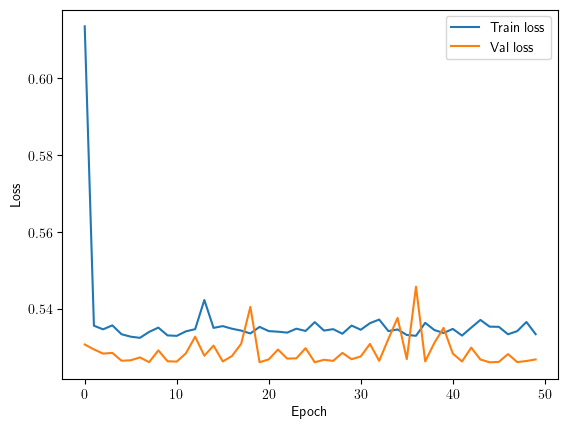

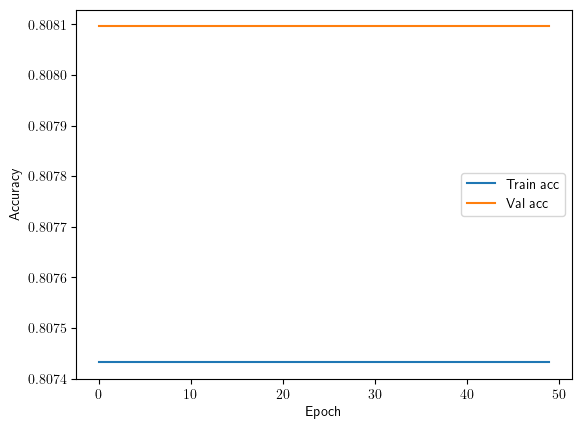

In [27]:

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'loss_eps{epsilon}_epk{epochs}.png', dpi=450)
plt.show()

plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f'acc_eps{epsilon}_epk{epochs}.png', dpi=450)
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


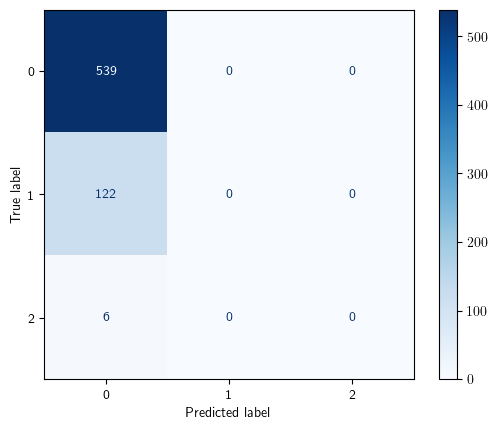

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_val_pred = model.predict(X_test).argmax(axis=1)  # for softmax output
cm = confusion_matrix(y_test, y_val_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()
